In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [3]:
from greedy_algo import GreedyAlgo
from BYE_greedy_algo import BYEGreedyAlgo
from baseline_algo import BaselineAlgo
from simulator import Simulator

In [4]:
simulator = Simulator()
greedy_algo = GreedyAlgo()
bye_greedy_algo = BYEGreedyAlgo()
naive_algo = BaselineAlgo()
algorithms = [greedy_algo, bye_greedy_algo, naive_algo]

In [5]:
byga = "Bar-Yehuda and Even\'s Greedy Algorithm"
img_path = '../article_src/img/'

Vertex weight is a random positive integer from 1 to 256 with uniform distribution

In [6]:
weight_gen = lambda size:np.random.randint(255, size=size) + 1

### All graphs with $\le 7$ nodes

In [162]:
test_graphs1 = []
for i in tqdm(range(1, 1253)):
  new_graph = nx.graph_atlas(i)
  if new_graph.number_of_nodes() > 8:
    break
  if new_graph.number_of_edges() > 0:
    for j in range(100):
      new_weighted_graph = new_graph.copy()
      new_weighted_graph.name = 'graph_atlas_{}_{}'.format(i, j)
      new_nodes = list(new_graph.nodes)
      nx.set_node_attributes(new_weighted_graph, dict(zip(new_nodes, weight_gen(len(new_nodes)))), 'weight')
      test_graphs1.append(new_weighted_graph)

  0%|          | 0/1252 [00:00<?, ?it/s]

In [167]:
df1 = simulator.simulate_and_parse(algorithms, test_graphs1, repetitions=1)
df1.head(5)

  0%|          | 0/124500 [00:00<?, ?it/s]

scenario_info                  Greedy Algo         \
          graph             name        time weight   
0        (0, 1)  graph_atlas_3_0    0.000067     49   
1        (0, 1)  graph_atlas_3_1    0.000037     50   
2        (0, 1)  graph_atlas_3_2    0.000034     28   
3        (0, 1)  graph_atlas_3_3    0.000032     24   
4        (0, 1)  graph_atlas_3_4    0.000032    118   

  Bar-Yehuda and Even's Greedy Algorithm        Naive algorithm         
                                    time weight            time weight  
0                               0.000042     49        0.000016    113  
1                               0.000031     50        0.000010    199  
2                               0.000030     28        0.000010     28  
3                               0.000030     24        0.000010     24  
4                               0.000029    118        0.000010    118

In [186]:
df1['atlas_id'] = df1['scenario_info', 'name'].apply(lambda name:int(name.split('_')[2]))
df1_grouped = df1.groupby('atlas_id').mean()
df1_grouped

/tmp/ipykernel_277293/1264679445.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df1_grouped = df1.groupby('atlas_id').mean()


Greedy Algo         Bar-Yehuda and Even's Greedy Algorithm          \
                time  weight                                   time  weight   
atlas_id                                                                      
3           0.000034   97.26                               0.000030   97.26   
5           0.000036   85.00                               0.000034   82.64   
6           0.000049  123.89                               0.000046  139.73   
7           0.000050  191.60                               0.000055  216.77   
9           0.000041   82.50                               0.000039   82.50   
...              ...     ...                                    ...     ...   
1248        0.000143  571.38                               0.000107  672.14   
1249        0.000146  594.81                               0.000112  674.34   
1250        0.000141  592.03                               0.000109  676.62   
1251        0.000149  651.85                               0.000114  729.39   
1252        0.000156  668.52                               0.000117  714.31   

         Naive algorithm          
                    time  weight  
atlas_id                          
3               0.000010  128.70  
5               0.000011  123.02  
6               0.000012  125.21  
7               0.000012  265.19  
9               0.000011  130.19  
...                  ...     ...  
1248            0.000016  731.50  
1249            0.000017  741.86  
1250            0.000016  742.51  
1251            0.000017  769.00  
1252            0.000018  755.18  

[1245 rows x 6 columns]

In [219]:
df1_grouped['weight_sum'] = df1_grouped['Naive algorithm', 'weight'] + df1_grouped['Bar-Yehuda and Even\'s Greedy Algorithm', 'weight'] + df1_grouped['Greedy Algo', 'weight']
df1_grouped_s = df1_grouped.sort_values('weight_sum')
df1_grouped_s

Greedy Algo         Bar-Yehuda and Even's Greedy Algorithm          \
                time  weight                                   time  weight   
atlas_id                                                                      
5           0.000036   85.00                               0.000034   82.64   
54          0.000041   82.62                               0.000037   82.62   
9           0.000041   82.50                               0.000039   82.50   
210         0.000048   90.15                               0.000045   90.15   
3           0.000034   97.26                               0.000030   97.26   
...              ...     ...                                    ...     ...   
1242        0.000146  600.87                               0.000111  720.06   
1238        0.000143  587.90                               0.000107  744.01   
1252        0.000156  668.52                               0.000117  714.31   
1251        0.000149  651.85                               0.000114  729.39   
1225        0.000134  614.76                               0.000105  754.23   

         Naive algorithm         weight_sum  
                    time  weight             
atlas_id                                     
5               0.000011  123.02     290.66  
54              0.000011  128.47     293.71  
9               0.000011  130.19     295.19  
210             0.000013  123.23     303.53  
3               0.000010  128.70     323.22  
...                  ...     ...        ...  
1242            0.000017  795.34    2116.27  
1238            0.000017  790.01    2121.92  
1252            0.000018  755.18    2138.01  
1251            0.000017  769.00    2150.24  
1225            0.000016  822.00    2190.99  

[1245 rows x 7 columns]

In [203]:
sum(df1_grouped_s[df1_grouped_s['Greedy Algo', 'weight'] < 400]['Bar-Yehuda and Even\'s Greedy Algorithm', 'weight'] > 600)

0

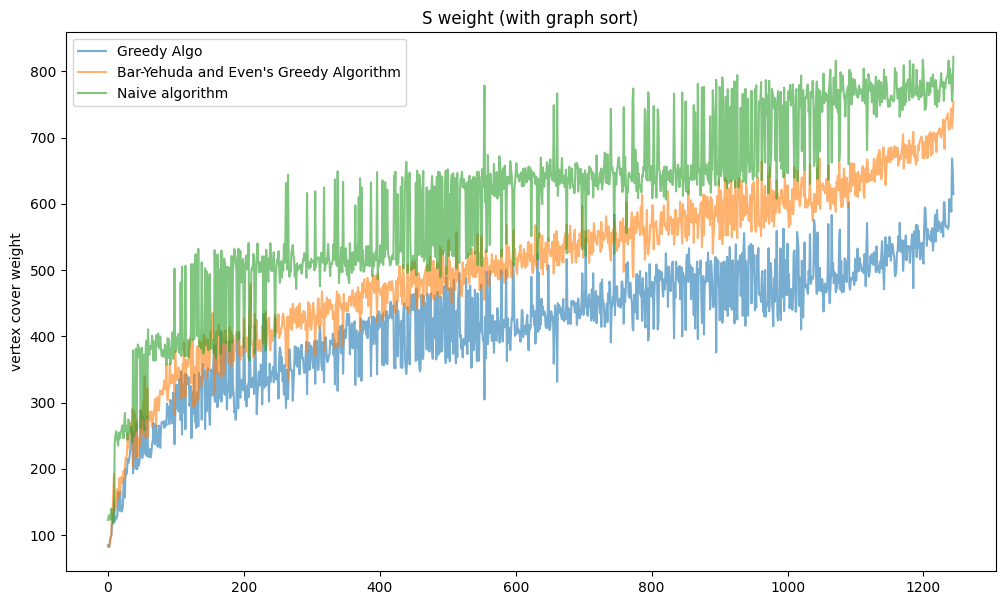

In [227]:
x_grid = np.arange(len(df1_grouped_s))
plt.figure(figsize=(12, 7))
plt.plot(x_grid, df1_grouped_s['Greedy Algo', 'weight'], alpha=0.6, label='Greedy Algo')
plt.plot(x_grid, df1_grouped_s['Bar-Yehuda and Even\'s Greedy Algorithm', 'weight'], alpha=0.6, label=byga)
plt.plot(x_grid, df1_grouped_s['Naive algorithm', 'weight'], alpha=0.6, label='Naive algorithm')
plt.legend()
plt.ylabel('vertex cover weight')
plt.title('S weight (with graph sort)')
plt.savefig('../article_src/img/simple_plot.png')

In [235]:
df1['ga_by_ratio'] = df1['Greedy Algo', 'weight'] / df1['Bar-Yehuda and Even\'s Greedy Algorithm', 'weight']
df1['num_of_nodes'] = df1['scenario_info', 'graph'].apply(lambda graph: graph.number_of_nodes())

In [243]:
list(np.arange(0.5, 2, 0.1))

[0.5,
 0.6,
 0.7,
 0.7999999999999999,
 0.8999999999999999,
 0.9999999999999999,
 1.0999999999999999,
 1.1999999999999997,
 1.2999999999999998,
 1.4,
 1.4999999999999998,
 1.5999999999999996,
 1.6999999999999997,
 1.7999999999999998,
 1.8999999999999997]

In [251]:
(1.5 <= df1['ga_by_ratio']) & (df1['ga_by_ratio'] < 1.5 + 0.1)

0         False
1         False
2         False
3         False
4         False
          ...  
124495    False
124496    False
124497    False
124498    False
124499    False
Name: ga_by_ratio, Length: 124500, dtype: bool

In [263]:
heatmap_data = [np.array([
  sum((df1['num_of_nodes'] == non) & 
  (threshold <= df1['ga_by_ratio']) & 
  (df1['ga_by_ratio'] < threshold + 0.1)) 
  for threshold in np.arange(0.5, 2, 0.1)], dtype=float)
  for non in range(1, 8)]

for i in range(1, len(heatmap_data)):
  heatmap_data[i] /= np.sum(heatmap_data[i])

In [266]:
heatmap_data

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.03691275, 0.04697987, 0.03691275, 0.02684564, 0.03020134,
        0.79194631, 0.01342282, 0.01006711, 0.        , 0.00671141,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([0.07807808, 0.08508509, 0.05705706, 0.03503504, 0.04104104,
        0.66066066, 0.01201201, 0.01101101, 0.00600601, 0.01001001,
        0.003003  , 0.        , 0.        , 0.        , 0.001001  ]),
 array([8.90909091e-02, 1.38181818e-01, 9.09090909e-02, 7.87878788e-02,
        5.93939394e-02, 4.96666667e-01, 2.30303030e-02, 1.27272727e-02,
        6.96969697e-03, 2.72727273e-03, 3.03030303e-04, 6.06060606e-04,
        0.00000000e+00, 3.03030303e-04, 3.03030303e-04]),
 array([7.11612903e-02, 1.33612903e-01, 1.40903226e-01, 9.66451613e-02,
        6.79354839e-02, 4.34387097e-01, 2.78064516e-02, 1.62580645e-02,
        7.74193548e-03, 2.2580

In [299]:
x_labels = np.arange(0.5, 2.1, 0.1)
x_labels = [0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. ]

In [302]:
heatmap_data

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.03691275, 0.04697987, 0.03691275, 0.02684564, 0.03020134,
        0.79194631, 0.01342282, 0.01006711, 0.        , 0.00671141,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([0.07807808, 0.08508509, 0.05705706, 0.03503504, 0.04104104,
        0.66066066, 0.01201201, 0.01101101, 0.00600601, 0.01001001,
        0.003003  , 0.        , 0.        , 0.        , 0.001001  ]),
 array([8.90909091e-02, 1.38181818e-01, 9.09090909e-02, 7.87878788e-02,
        5.93939394e-02, 4.96666667e-01, 2.30303030e-02, 1.27272727e-02,
        6.96969697e-03, 2.72727273e-03, 3.03030303e-04, 6.06060606e-04,
        0.00000000e+00, 3.03030303e-04, 3.03030303e-04]),
 array([7.11612903e-02, 1.33612903e-01, 1.40903226e-01, 9.66451613e-02,
        6.79354839e-02, 4.34387097e-01, 2.78064516e-02, 1.62580645e-02,
        7.74193548e-03, 2.2580

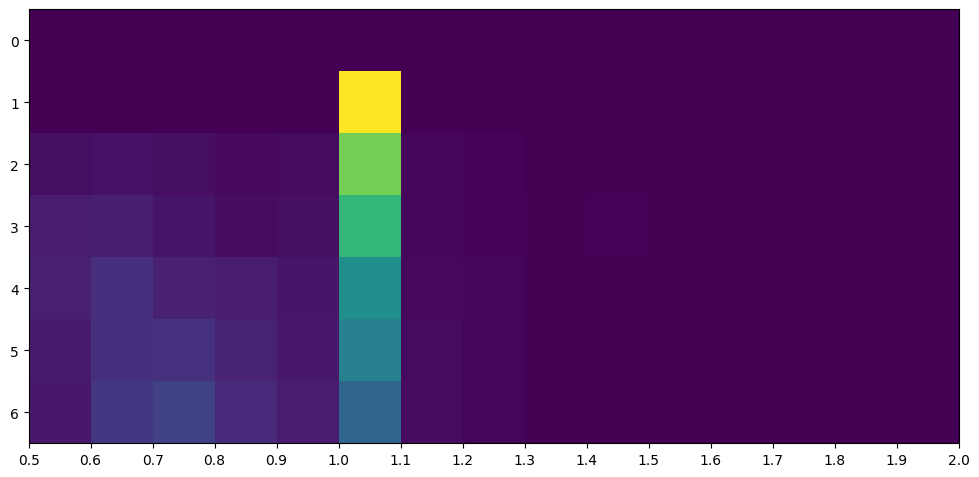

In [301]:
plt.figure(figsize=(12, 7))
plt.imshow(heatmap_data)
plt.xticks(np.arange(len(heatmap_data[0]) + 1) - 0.5, x_labels)
plt.show()

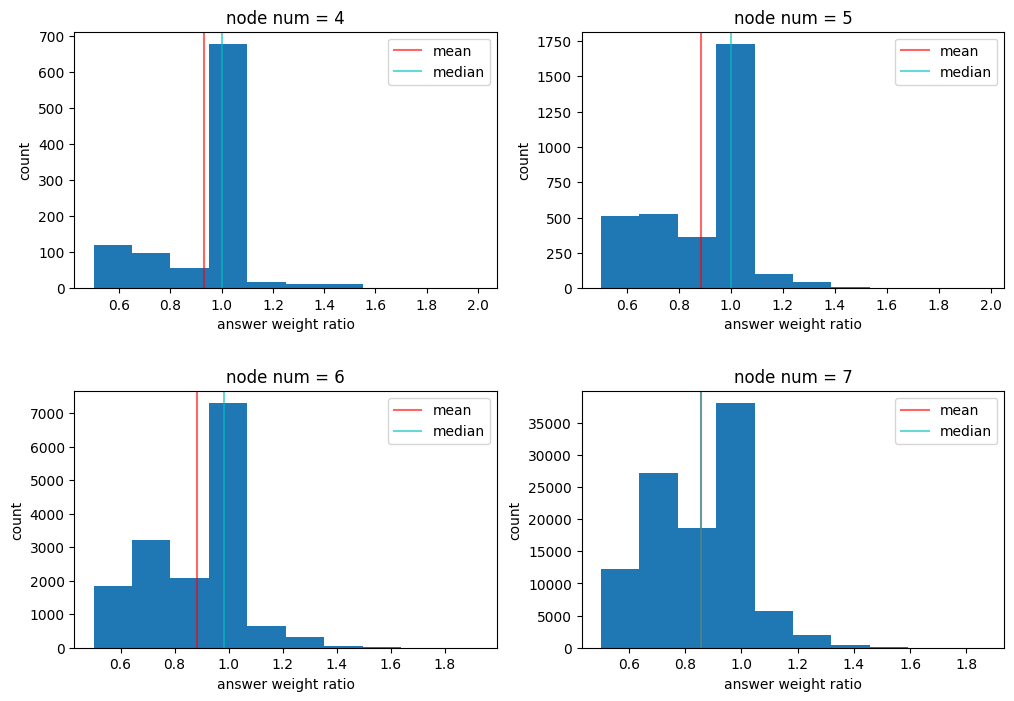

In [350]:
fig = plt.figure(figsize=(12, 8))
def get_hist_df1_ratio(node_num):
  ratio_data = df1[df1['num_of_nodes'] == node_num]['ga_by_ratio']
  plt.hist(ratio_data)
  plt.axvline(np.mean(ratio_data), label='mean', c='red', alpha=0.6)
  plt.axvline(np.median(ratio_data), label='median', c='c', alpha=0.6)
  plt.xlabel('answer weight ratio')
  plt.ylabel('count')
  plt.legend()
  plt.title('node num = {}'.format(node_num))
plt.subplot(221)
get_hist_df1_ratio(4)
plt.subplot(222)
get_hist_df1_ratio(5)
plt.subplot(223)
get_hist_df1_ratio(6)
plt.subplot(224)
get_hist_df1_ratio(7)
plt.subplots_adjust(hspace=0.4)
plt.savefig(img_path + 'simple_hists.png')
plt.show()

### Random gnp graphs

In [18]:
nodes_nums = [100, 500]
edge_probs = [0.2, 0.5, 0.8]
repetitions = 100
test_graphs2 = []
for nodes_num in nodes_nums:
  for edge_prob in edge_probs:
    for _ in range(repetitions):
      graph = nx.gnp_random_graph(nodes_num, edge_prob)
      graph.edge_prob = edge_prob
      nx.set_node_attributes(graph, dict(zip(list(graph.nodes), weight_gen(graph.number_of_nodes()))), 'weight')
      test_graphs2.append(graph)

In [19]:
df2 = simulator.simulate_and_parse(algorithms, test_graphs2, repetitions=1)

  0%|          | 0/600 [00:00<?, ?it/s]

In [20]:
df2

scenario_info      Greedy Algo  \
                                                 graph name        time   
0    (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...         0.030549   
1    (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...         0.017816   
2    (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...         0.020063   
3    (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...         0.019650   
4    (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...         0.017668   
..                                                 ...  ...         ...   
595  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...         0.596935   
596  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...         0.626765   
597  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...         0.600397   
598  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...         0.613181   
599  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...         0.599423   

           Bar-Yehuda and Even's Greedy Algorithm        Naive algorithm  \
    weight                                   time weight            time   
0    10274                               0.010247  11835        0.000232   
1    11157                               0.008697  12717        0.000247   
2    11152                               0.009307  12492        0.000232   
3    10875                               0.009539  12162        0.000246   
4    10904                               0.009850  11953        0.000226   
..     ...                                    ...    ...             ...   
595  63757                               3.024539  63841        0.013544   
596  67821                               3.128675  68108        0.013352   
597  62802                               3.095447  62852        0.013796   
598  65203                               3.185048  65575        0.013626   
599  63669                               3.040279  63956        0.013085   

            
    weight  
0    12138  
1    13210  
2    12866  
3    12162  
4    12117  
..     ...  
595  63841  
596  68316  
597  62852  
598  65575  
599  63956  

[600 rows x 8 columns]

In [22]:
df2['edge_prob'] = df2['scenario_info', 'graph'].apply(lambda graph: graph.edge_prob)
df2['node_num'] = df2['scenario_info', 'graph'].apply(lambda graph: graph.number_of_nodes())

In [59]:
sample1 = df2[(df2['node_num'] == 100) & (df2['edge_prob'] == 0.2)]
sample2 = df2[(df2['node_num'] == 500) & (df2['edge_prob'] == 0.2)]

In [51]:
sample1['Greedy Algo', 'weight']

0     10274
1     11157
2     11152
3     10875
4     10904
      ...  
95    10467
96    10993
97     9138
98     9046
99     9841
Name: (Greedy Algo, weight), Length: 100, dtype: int64

In [60]:
sample2['Greedy Algo', 'weight']

300    60410
301    60749
302    60694
303    61480
304    63646
       ...  
395    61508
396    61842
397    61228
398    63099
399    63871
Name: (Greedy Algo, weight), Length: 100, dtype: int64

In [64]:
sample2['scenario_info', 'graph'].values

array([<networkx.classes.graph.Graph object at 0x7f47f25f06a0>,
      dtype=object)

In [69]:
for nodes_num_id, node_num in enumerate(nodes_nums):
  print(node_num)

100
500


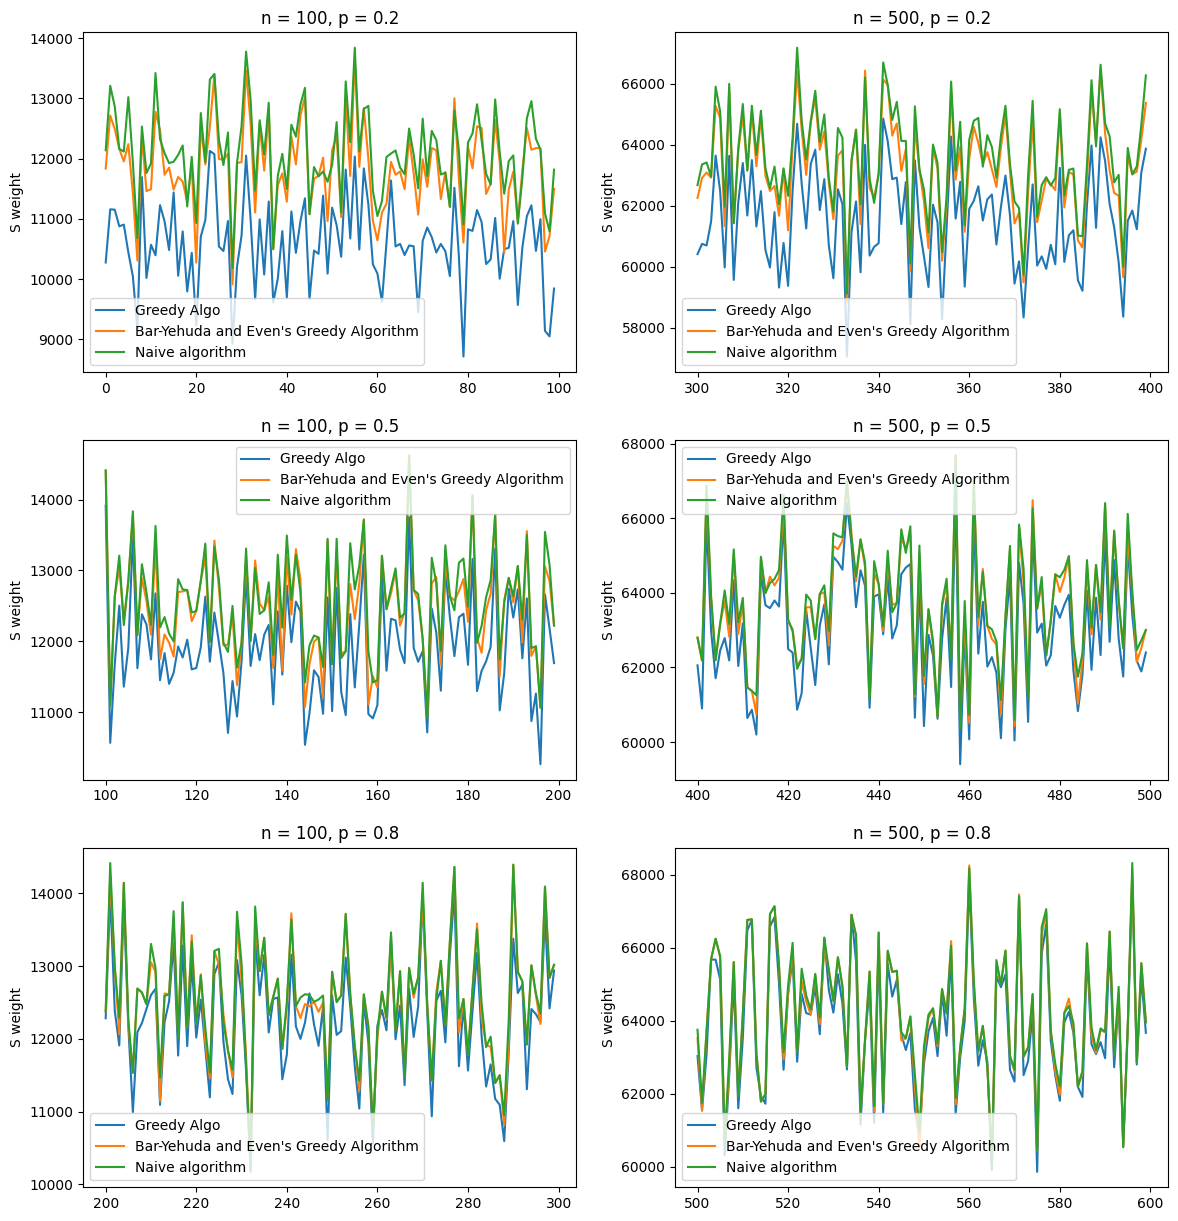

In [75]:
plt.figure(figsize=(14,15))
for edge_prob_id, edge_prob in enumerate(edge_probs):
  for nodes_num_id, node_num in enumerate(nodes_nums):
    sample = df2[(df2['node_num'] == node_num) & (df2['edge_prob'] == edge_prob)]
    plt.subplot(321 + edge_prob_id * 2 + nodes_num_id)
    plt.plot(sample['Greedy Algo', 'weight'], label='Greedy Algo')
    plt.plot(sample[byga, 'weight'], label=byga)
    plt.plot(sample['Naive algorithm', 'weight'], label='Naive algorithm')
    plt.title('n = {}, p = {}'.format(node_num, edge_prob))
    plt.legend()
    plt.ylabel('S weight')
plt.savefig(img_path + 'gnp_plots.png')
plt.show()

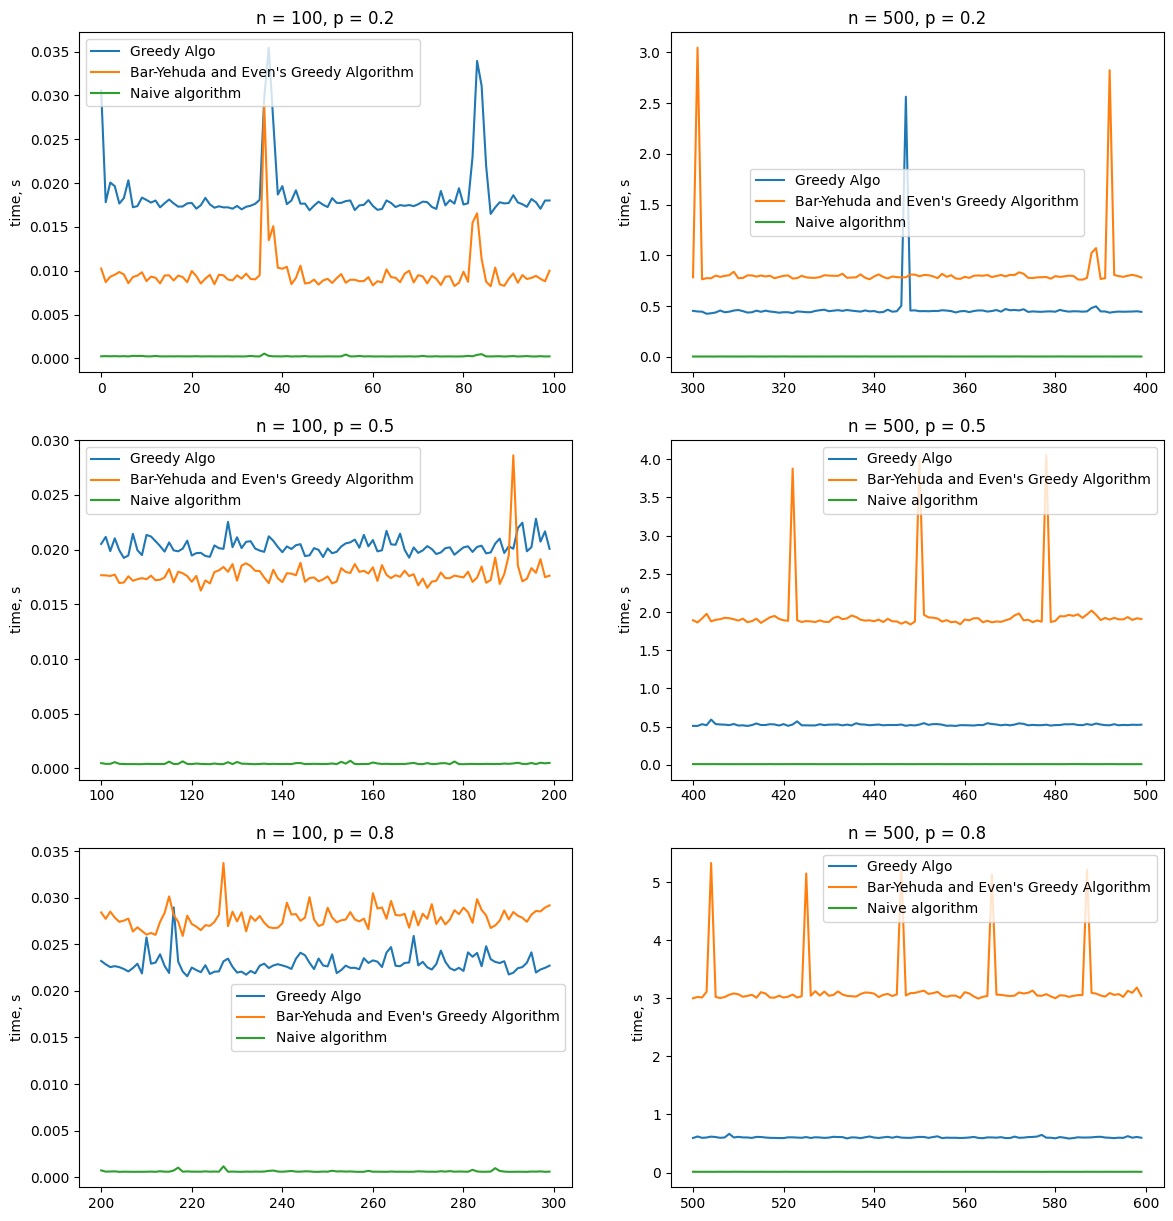

In [81]:
plt.figure(figsize=(14,15))
for edge_prob_id, edge_prob in enumerate(edge_probs):
  for nodes_num_id, node_num in enumerate(nodes_nums):
    sample = df2[(df2['node_num'] == node_num) & (df2['edge_prob'] == edge_prob)]
    plt.subplot(321 + edge_prob_id * 2 + nodes_num_id)
    plt.plot(sample['Greedy Algo', 'time'], label='Greedy Algo')
    plt.plot(sample[byga, 'time'], label=byga)
    plt.plot(sample['Naive algorithm', 'time'], label='Naive algorithm')
    plt.title('n = {}, p = {}'.format(node_num, edge_prob))
    plt.legend()
    plt.ylabel('time, s')
plt.savefig(img_path + 'gnp_time_plots.png')
plt.show()

In [76]:
ratio2 = df2['Greedy Algo', 'weight'] / df2['Bar-Yehuda and Even\'s Greedy Algorithm', 'weight']

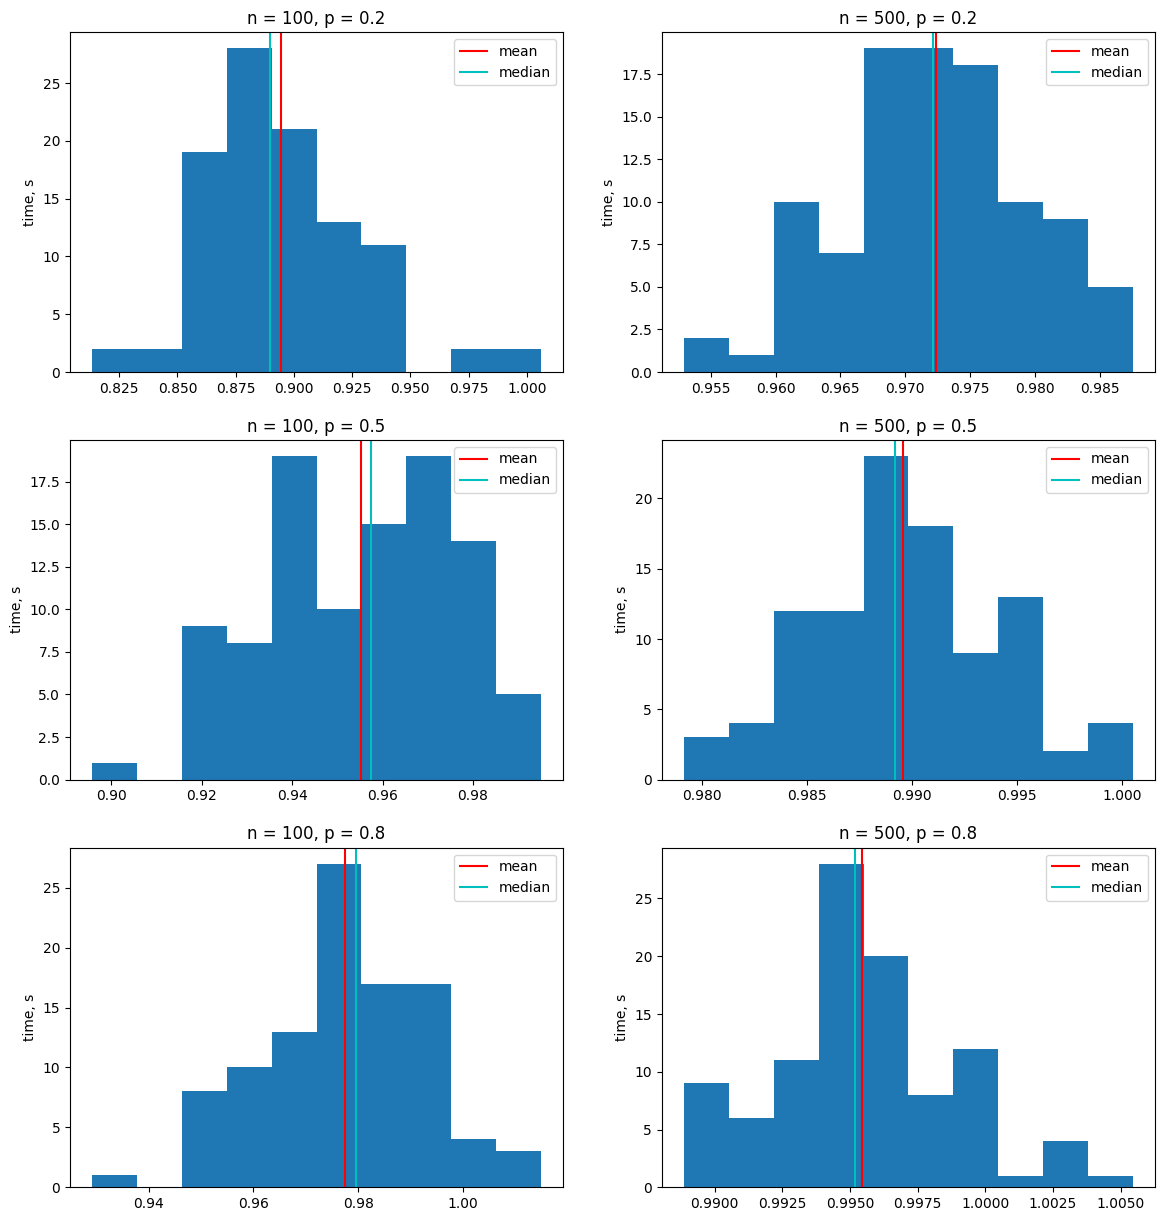

In [80]:
plt.figure(figsize=(14,15))
for edge_prob_id, edge_prob in enumerate(edge_probs):
  for nodes_num_id, node_num in enumerate(nodes_nums):
    sample = ratio2[(df2['node_num'] == node_num) & (df2['edge_prob'] == edge_prob)]
    plt.subplot(321 + edge_prob_id * 2 + nodes_num_id)
    plt.hist(sample)
    plt.axvline(np.mean(sample), label='mean', c='red')
    plt.axvline(np.median(sample), label='median', c='c')
    plt.title('n = {}, p = {}'.format(node_num, edge_prob))
    plt.legend()
    plt.ylabel('time, s')
plt.savefig(img_path + 'gnp_ratio_hists.png')
plt.show()

### Some famous graphs

In [24]:
def quick_draw(test_set, filename):
  df_foo = simulator.simulate_and_parse(algorithms, test_set, repetitions=10)
  df_foo['sum'] = df_foo['Greedy Algo', 'weight'] + df_foo[byga, 'weight'] + df_foo['Naive algorithm', 'weight']
  df_foo = df_foo.sort_values('sum')
  plt.figure(figsize=(24,7))
  plt.subplot(121)
  x_grid = np.arange(len(df_foo))
  plt.plot(x_grid, df_foo['Greedy Algo', 'weight'], label='Greedy Algo', alpha=0.8)
  plt.plot(x_grid, df_foo[byga, 'weight'], label=byga, alpha=0.8)
  plt.plot(x_grid, df_foo['Naive algorithm', 'weight'], label='Naive algorithm', alpha=0.8)
  plt.legend()
  plt.ylabel('S weight')
  plt.title('Answer weight')

  ratio = df_foo['Greedy Algo', 'weight'] / df_foo[byga, 'weight']
  plt.subplot(122)
  plt.hist(ratio)
  plt.axvline(np.mean(ratio), c='red')
  plt.axvline(np.median(ratio), c='c')
  plt.ylabel('ratio')
  plt.title('Answer weight ratio')
  plt.savefig(img_path + filename)
  plt.show()

In [25]:
def subscribe_graph(graph):
  nx.set_node_attributes(graph, dict(zip(list(graph.nodes), weight_gen(graph.number_of_nodes()))), 'weight')
  return graph

In [113]:
test_set_tree = [subscribe_graph(nx.random_tree(300)) for _ in range(100)]

  0%|          | 0/100 [00:00<?, ?it/s]

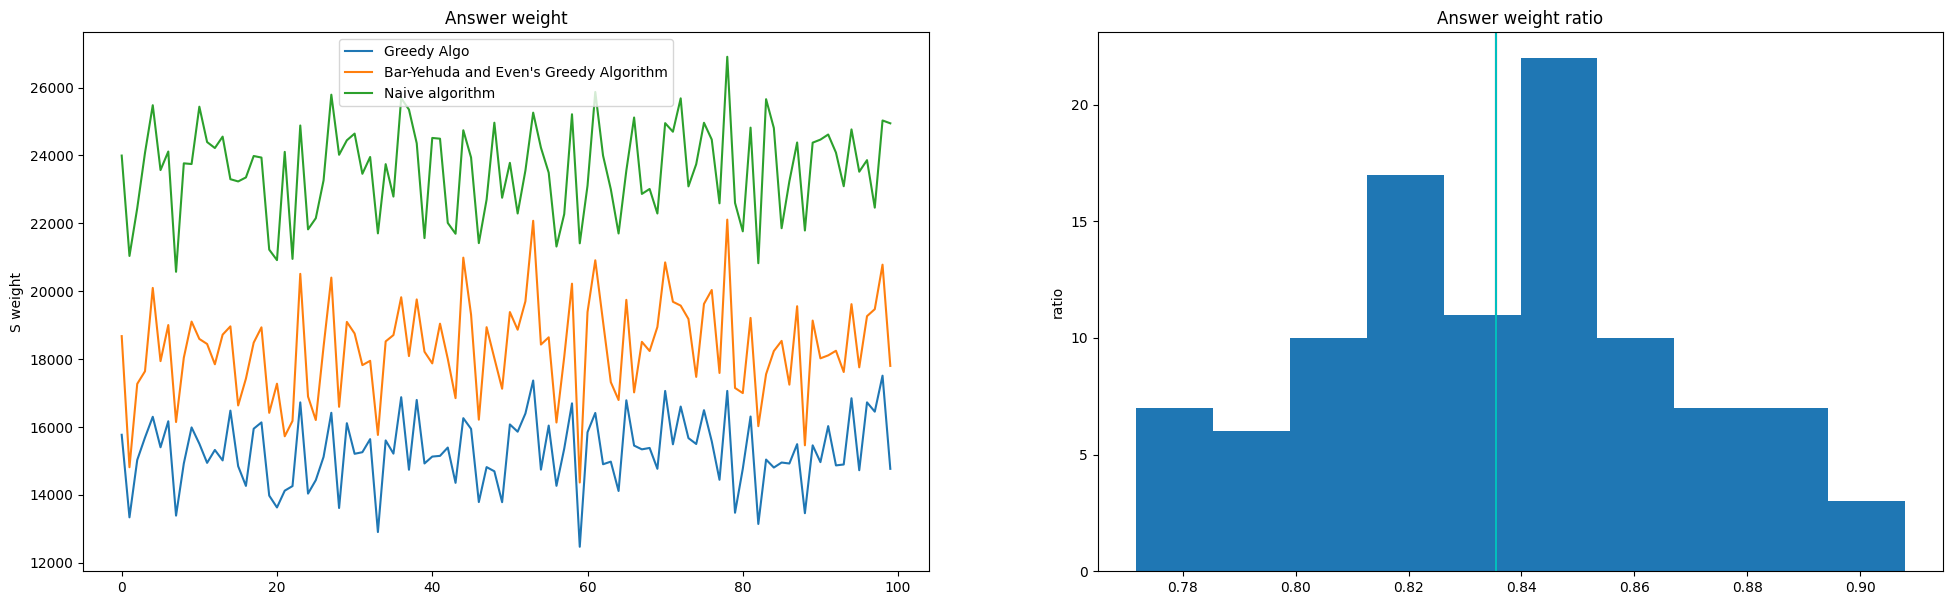

In [114]:
quick_draw(test_set_tree, 'random_tree_quick.png')

In [16]:
planar_graphs_8 = nx.read_graph6('data/planar_conn.8.g6')
planar_graphs_8 = [subscribe_graph(graph) for graph in planar_graphs_8]

  0%|          | 0/5974 [00:00<?, ?it/s]

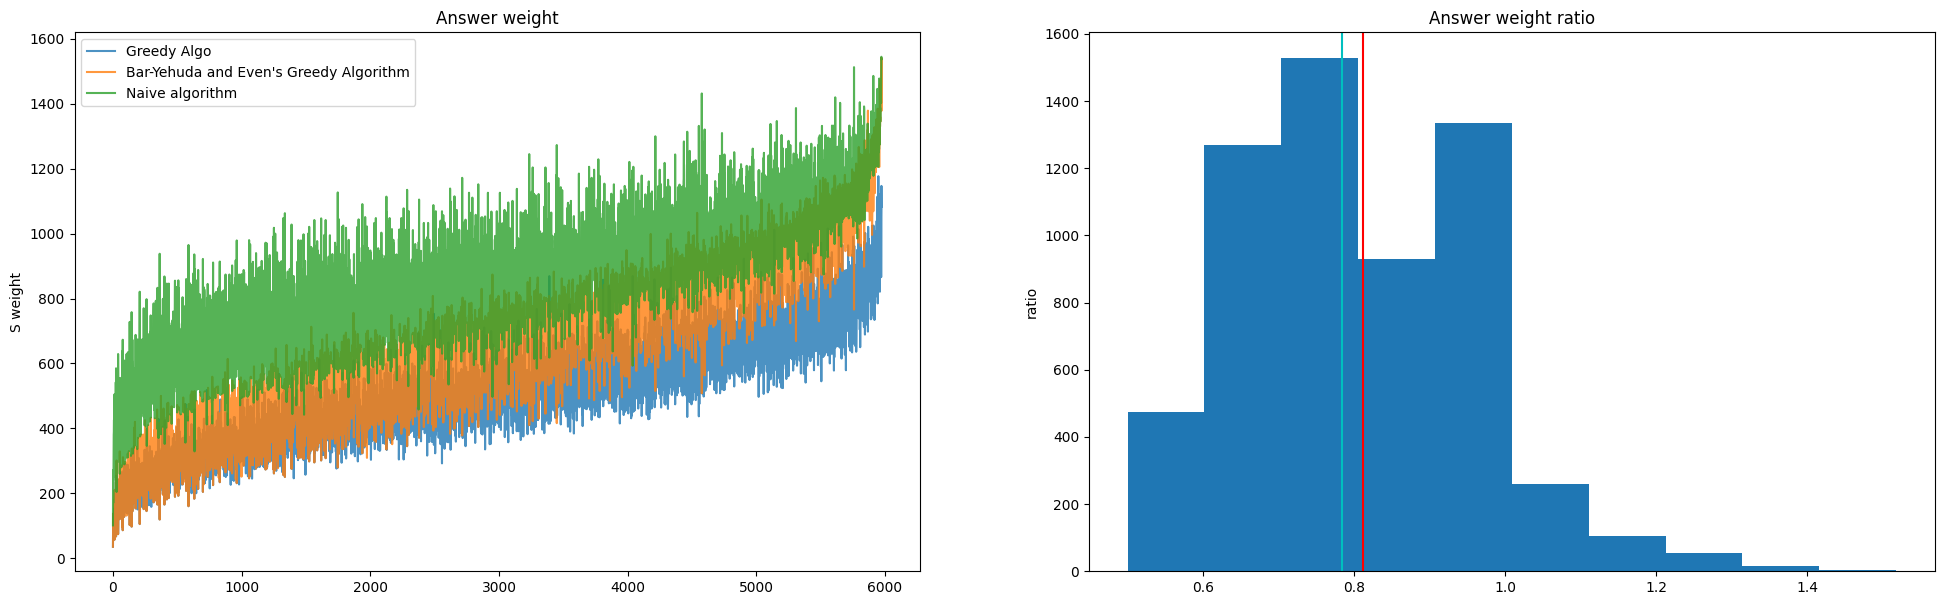

In [26]:
quick_draw(planar_graphs_8, 'planar8_quick.png')

In [29]:
srg_graphs = nx.read_graph6('data/sr371889some.g6')
srg_graphs = [subscribe_graph(graph) for graph in srg_graphs]

  0%|          | 0/6760 [00:00<?, ?it/s]

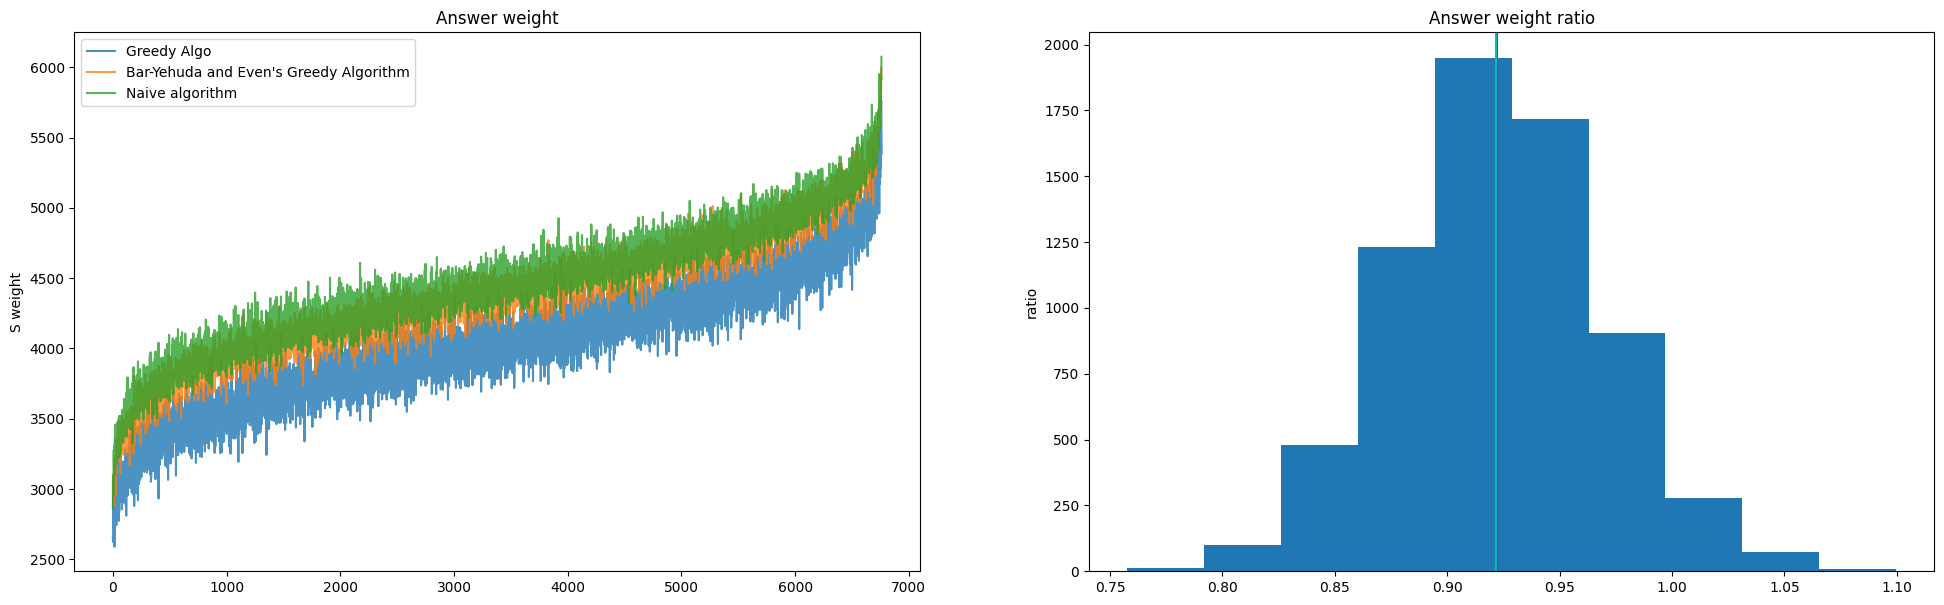

In [30]:
quick_draw(srg_graphs, 'srg_quick.png')